# Logistic Regression of Customer Survey Satisfaction

### Importing the dataset

In [4]:
import pandas as pd 
dataset=pd.read_csv('midterm cleaned.csv')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10616 entries, 0 to 10615
Data columns (total 9 columns):
 #   Column                                                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                                                        --------------  -----  
 0   Customer                                                                                                                                                      10616 non-null  int64  
 1   How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied      10616 non-null  int64  
 2   How satisfied were you with the quality of the food at Alis?                             1-5 where 1 = extremely dissatisfied and 5 = extre

In [6]:
dataset.info

<bound method DataFrame.info of        Customer  \
0             1   
1             2   
2             3   
3             4   
4             5   
...         ...   
10611     10612   
10612     10613   
10613     10614   
10614     10615   
10615     10616   

       How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied  \
0                                                      5                                                                                                          
1                                                      3                                                                                                          
2                                                      4                                                                                                          
3                                                      5                               

In [7]:
dataset.head(10)

,Customer,How satisfied were you with your overall delivery experience at Ali? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the quality of the food at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the speed of delivery at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,Was your order accurate? Please respond 1 or 0.,How satisfied were you with your overall delivery experience at Ali? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied.1,How satisfied were you with the quality of the food at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied.1,How satisfied were you with the speed of delivery at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied.1,Was your order accurate? Please respond 1 or 0..1
0,1,5,3,4,1,5.0,3.0,4.0,1.0
1,2,3,4,3,1,3.0,4.0,3.0,1.0
2,3,4,5,2,1,4.0,5.0,2.0,1.0
3,4,5,3,4,1,5.0,3.0,4.0,1.0
4,5,2,5,1,1,2.0,5.0,1.0,1.0
5,6,5,2,5,1,5.0,2.0,5.0,1.0
6,7,1,4,3,1,1.0,4.0,3.0,1.0
7,8,3,3,2,0,3.0,3.0,2.0,0.0
8,9,5,1,3,1,5.0,1.0,3.0,1.0
9,10,3,5,3,0,3.0,5.0,3.0,0.0


### Getting the inputs and output

In [8]:
#[row,column]
X = dataset.iloc[:,1:4].values
y = dataset.iloc[:,4].values


In [9]:
X

array([[5, 3, 4],
       [3, 4, 3],
       [4, 5, 2],
       ...,
       [5, 3, 3],
       [3, 3, 3],
       [1, 3, 3]])

In [10]:
y

array([1, 1, 1, ..., 1, 1, 1])

### Creating the Training Set and the Test Set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


In [12]:
X_train

array([[5, 5, 5],
       [3, 3, 3],
       [5, 5, 5],
       ...,
       [5, 3, 3],
       [3, 5, 3],
       [1, 3, 5]])

In [13]:
X_test

array([[3, 3, 3],
       [2, 2, 5],
       [4, 3, 3],
       ...,
       [5, 5, 5],
       [3, 3, 3],
       [4, 4, 1]])

In [14]:
y_train


array([1, 1, 1, ..., 1, 0, 1])

In [15]:
y_test

array([1, 1, 0, ..., 0, 1, 1])

### Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [17]:
X_train


array([[ 1.21762205,  1.20312471,  1.21596761],
       [-0.21999303, -0.22581725, -0.21660688],
       [ 1.21762205,  1.20312471,  1.21596761],
       ...,
       [ 1.21762205, -0.22581725, -0.21660688],
       [-0.21999303,  1.20312471, -0.21660688],
       [-1.6576081 , -0.22581725,  1.21596761]])

### Building the model

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)



### Training the model

In [19]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Inference

Making the predictons of the data points in the test set

In [20]:
y_pred = model.predict(sc.transform(X_test))


In [21]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [22]:
y_test

array([1, 1, 0, ..., 0, 1, 1])

Making the prediction of a single data point with:

1   How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied      10616 non-null  int64  
2   How satisfied were you with the quality of the food at Alis?                             1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied     10616 non-null  int64  
3   How satisfied were you with the speed of delivery at Alis?     

In [23]:
model.predict(sc.transform([[1,2,3]]))

array([1])

### Confusion Matrix

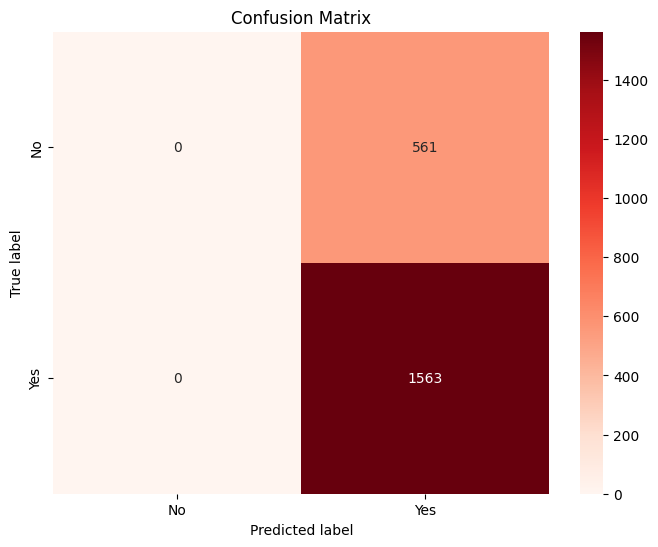

In [28]:
# Import the necessary libraries for plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['No', 'Yes'], 
            yticklabels=['No', 'Yes'])

# Labeling the axes and title
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

### Accuracy

In [25]:
(0+1563)/(0+1563+561+0)

0.7358757062146892

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7358757062146892